In [3]:
# Module handling
import os
import sys
module_path = os.path.abspath(os.path.join('..','..'))
if module_path not in sys.path:
    sys.path.append(module_path)
# Plots, visualisations and tests
from visualizer.main import Visualizer
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
from tkinter import Tk
from tkinter.filedialog import asksaveasfilename, askopenfilename
import ipympl
from tests.test3 import Test
# Utiles
import json

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [4]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(2,0), (5,1), (6,0), (8,3), (7,2), (8,7), (6,9), (5,8), (2,9), (1,7), (2,4), (4,5), (3,6), (5, 7), (5.5, 3), (2,2), (1,3), (0,1)]
polygon_example_colors = [1, 3, 1, 0, 2, 4, 0, 2, 0, 4, 1, 4, 4, 3, 4, 2, 0, 4]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[2], polygon_example_1[4])]

In [5]:
def draw_polygon(polygon):
    vis = Visualizer()
    vis.axis_equal()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()

In [6]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    vis.axis_equal()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()

In [7]:
def draw_polygon_tri(polygon,tri):

    vis = Visualizer()
    vis.axis_equal()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()

In [8]:
def make_triangulation_gif(polygon, triangulation):
  vis = Visualizer()
  vis.axis_equal()
  vis.add_polygon(polygon, fill=False)
  for line_segment in triangulation:
    vis.add_line_segment(line_segment, color='red')
  return vis

In [9]:
def draw_custom_polygon():
    
  # Initialize the figure and axis
  fig, ax = plt.subplots()
  ax.set_title("Click to add points and create a polygon")
  ax.set_xlim(0, 10)
  ax.set_ylim(0, 10)

  points = [] # List to store points
  closing_line = None  # List to store the closing line

  def on_click(event):
    nonlocal closing_line 
    if(event.inaxes == ax):
      x, y = event.xdata, event.ydata
      points.append((x, y))
      ax.plot(x, y, 'o', color='blue')

      # Draw polygon edges
      if(len(points) > 1):
        x_vals, y_vals = zip(*points)
        ax.plot(x_vals, y_vals, color='blue')
        
        # Update the closing line
        if(len(points) > 2):
          if(closing_line):
            closing_line.remove()
          closing_line, = ax.plot([x_vals[-1], x_vals[0]], [y_vals[-1], y_vals[0]], color='blue', linestyle='--')
    fig.canvas.draw()

  def save_points():
    if len(points) > 2:  # A valid polygon needs at least 3 points
        
        # Use tkinter dialog to select the save location
        Tk().withdraw()  # Hide the root tkinter window
        file_path = asksaveasfilename(
            defaultextension=".json",
            filetypes=[("JSON Files", "*.json"), ("All Files", "*.*")],
            title="Save Polygon Points as JSON"
        )
        
        if file_path:  # Only proceed if a file path was selected
            with open(file_path, "w") as f:
                json.dump(points, f)
            print(f"Points saved in anti-clockwise order to '{file_path}'")
        else:
            print("Save operation canceled.")
    else:
        print("Not enough points to form a polygon!")

  def load_points_from_json():
    nonlocal points, closing_line
    current_points = []
    Tk().withdraw()  # Hide the root tkinter window
    file_path = askopenfilename(
      filetypes=[("JSON Files", "*.json"), ("All Files", "*.*")],
      title="Load Polygon Points from JSON"
    )
    
    

    if file_path:  # Only proceed if a file path was selected
      try:
        
        with open(file_path, "r") as f:
            current_points = json.load(f)  # Load points from JSON
            
        print(f"Points successfully loaded from '{file_path}': {points}")
        clear_canvas()
        
        if(len(current_points) > 0):
          points = current_points
          x_vals, y_vals = zip(*points)
          ax.plot(x_vals, y_vals, 'o', color='blue')  # Plot the points
          
          for i in range(len(x_vals)-1):
            ax.plot([x_vals[i], x_vals[i+1]], [y_vals[i], y_vals[i+1]], color='blue', linestyle='-')  # Draw the polygon

          # Add a closing line
          closing_line, = ax.plot([x_vals[-1], x_vals[0]],  [y_vals[-1], y_vals[0]], color='blue', linestyle='--')
          
        fig.canvas.draw()
        
      except json.JSONDecodeError:
        print("Error: The selected file is not a valid JSON file.")
    else:
        print("No file selected.")

      
  def clear_canvas():
    nonlocal points, closing_line
    points = [] 
    if closing_line:
      closing_line.remove() 
      closing_line = None
    ax.cla()
    ax.set_title("Click to add points and create a polygon")
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    fig.canvas.draw() 

  fig.canvas.mpl_connect('button_press_event', on_click)

  width = 0.1
  height = 0.075

  save_ax = plt.axes([0.3-width/2,0, width, height])
  save_button = Button(save_ax, 'Save Points')
  save_button.on_clicked(lambda _: save_points())

  clear_ax = plt.axes([0.5-width/2, 0, width, height]) 
  clear_button = Button(clear_ax, 'Clear')
  clear_button.on_clicked(lambda _: clear_canvas())
  
  # Add Load from JSON Button
  load_ax = plt.axes([0.7 - width / 2, 0.0, width, height])  # Position of the load button
  load_button = Button(load_ax, 'Load JSON')
  load_button.on_clicked(lambda _ : load_points_from_json())

  
  # Hack to ensure working correctly
  fig._button = save_button
  fig._button_2 = clear_button
  fig._button_3 = load_button

  plt.show()

In [10]:
def load_points_from_file(filename="polygon_points.txt"):
  points = []
  try:
    with open(filename, "r") as file:
      for line in file:
        # Split the line by commas and strip extra spaces/newlines
        x, y = line.strip().split(",")
        points.append((float(x), float(y)))  # Convert to float
    print(f"Points loaded from {filename}")
  except FileNotFoundError:
    print(f"Error: {filename} not found.")
  except Exception as e:
    print(f"Error loading points: {e}")
  
  return points


## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Tworzenie własnego wielokąta

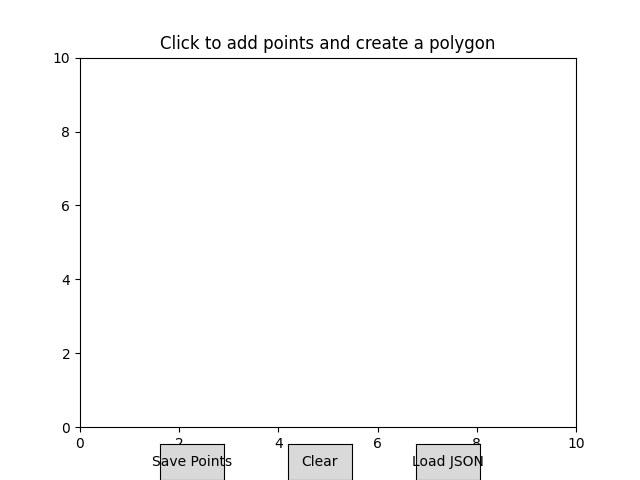

In [12]:
%matplotlib ipympl
draw_custom_polygon()
%matplotlib inline

In [13]:
def read_all_json_files_in_folder(folder_path):
  all_points = {}  # To store all points from all JSON files

  # Iterate over all files in the folder
  for file_name in os.listdir(folder_path):
    file_name_string = str(file_name).split('.')[0]
    if file_name.endswith(".json"):  # Only process JSON files
      file_path = os.path.join(folder_path, file_name)  # Get full file path
      try:
        with open(file_path, "r") as f:
          points = json.load(f)  # Load points from JSON
          if isinstance(points, list):  # Ensure it's a list
            print(file_name_string)
            all_points[file_name_string] = [tuple(point) for point in points] # Add points as tuples
          else:
            print(f"File '{file_name}' does not contain a valid list of points.")
      except json.JSONDecodeError:
          print(f"File '{file_name}' is not a valid JSON file.")
      except Exception as e:
          print(f"An error occurred while processing '{file_name}': {e}")

  return all_points

In [14]:
def read_points_from_json():
  # Hide the root tkinter window
  Tk().withdraw()
  
  # Open a file dialog to select the JSON file
  file_path = askopenfilename(
    filetypes=[("JSON Files", "*.json"), ("All Files", "*.*")],
    title="Load Polygon Points from JSON"
  )
  
  # If a file is selected, load the points
  if file_path:
    try:
      with open(file_path, "r") as f:
        points = json.load(f)  # Load JSON data as a list
      print(f"Points successfully loaded from '{file_path}': {points}")
      return [tuple(point) for point in points]  # Convert to list of tuples
    except json.JSONDecodeError:
      print("Error: The selected file is not a valid JSON file.")
      return []
  else:
    print("No file selected.")
    return []


In [15]:
plt.close('all')
polygons = read_all_json_files_in_folder('./json')

choinka
circle
flag
gora
jez
nie_monotoniczny
romb
serce


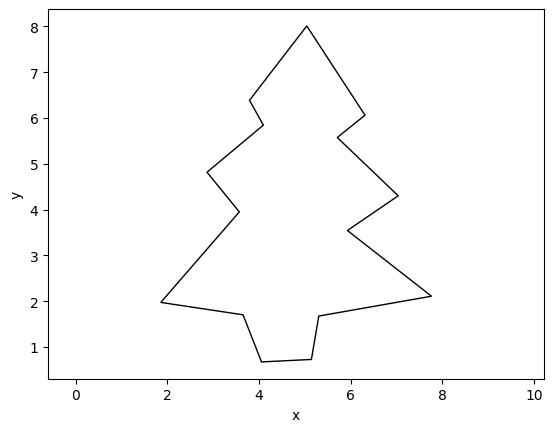

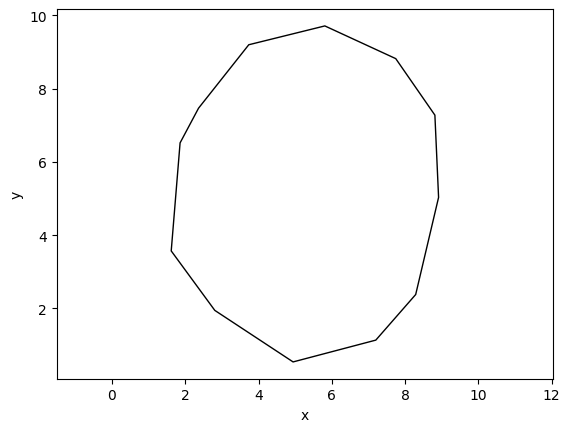

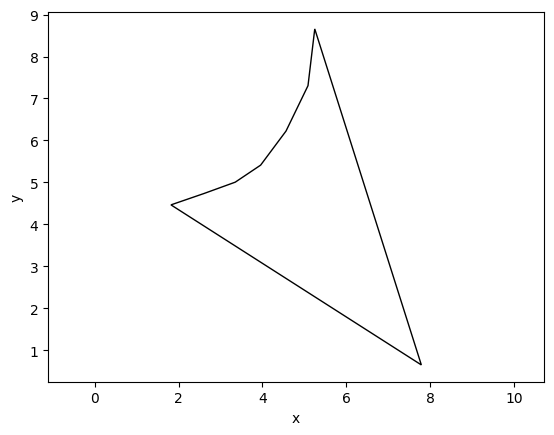

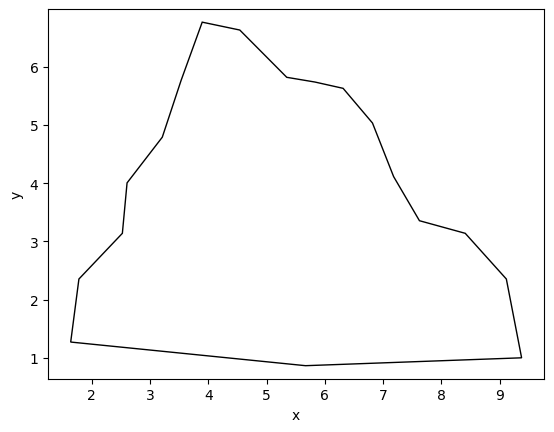

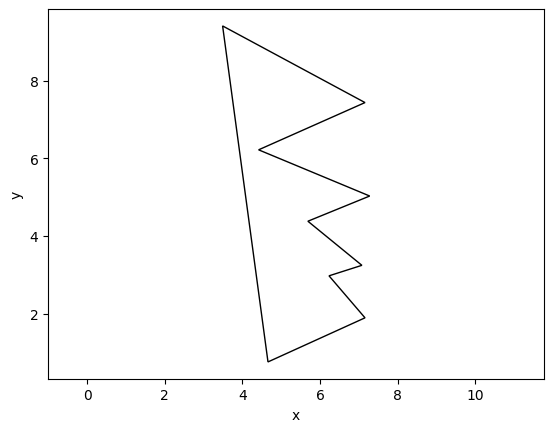

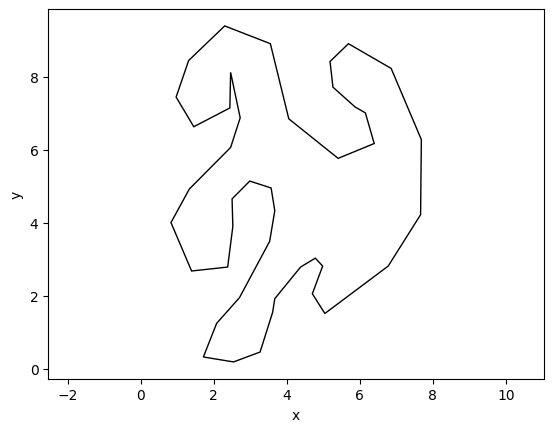

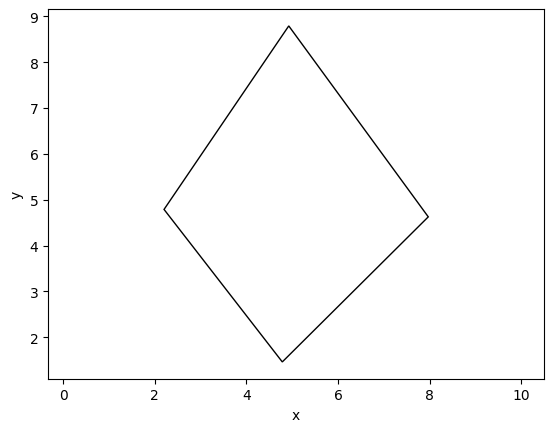

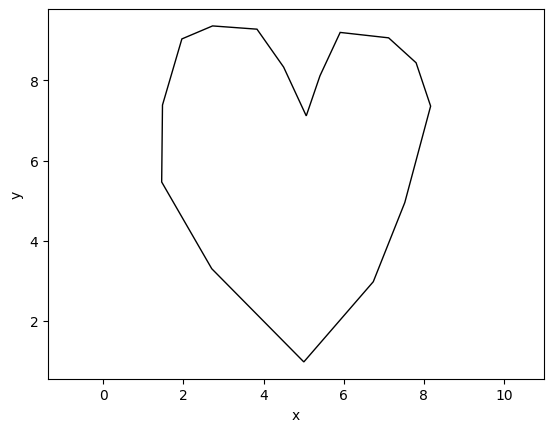

In [16]:
for key in polygons:
  draw_polygon(polygons[key])

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [17]:
def get_min_max(polygon):
  """
    Funkcja znajduje parę indeksów punktów (x_min, x_max), które mają odpowiednio najmniejszą i największą współrzędną 
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: para indeksów (x_min, x_max)
    """
  n = len(polygon)
  index_min = index_max = 0
  for i in range(n):
    if(polygon[index_min][1] > polygon[i][1]):
      index_min = i
    if(polygon[index_max][1] < polygon[i][1]):
      index_max = i
  return index_min, index_max

In [18]:
def partition_into_chains(polygon):
  n = len(polygon)
  i_min, i_max = get_min_max(polygon)
  LEFT = []
  RIGHT = []
  direction = 1
  
  current_index = i_max
  isLeft = True
  for _ in range(n):
    if(isLeft):
      LEFT.append(polygon[current_index])
    else:
      RIGHT.append(polygon[current_index])
    if(current_index == i_min): 
      direction = -1
      isLeft = False 
      current_index = i_max
      
    current_index = (current_index + 1 * direction) % n
    
  return LEFT, RIGHT

In [19]:
def is_chain_monotnic(chain):
  n = len(chain)
  if(n <= 2): 
    return True
  
  point_1 = chain[0]
  point_2 = chain[1]
  for i in range(2,n):
    if(point_1[1] < point_2[1]):
      return False
    point_1,point_2 = point_2, chain[i]
  return True
    

In [20]:
def is_y_monotonic(polygon):
  """
  Funkcja określa czy podana figura jest y-monotoniczna.
  :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
  :return: wartość bool - true, jeśli wielokąt jest monotoniczny i false jeśli nie jest
  """
  

  LEFT, RIGHT = partition_into_chains(polygon)
  return is_chain_monotnic(RIGHT) and is_chain_monotnic(LEFT)
  
is_y_monotonic(polygon_example_1)

True

Przeprowadź test poprawności powyższej funkcji.

In [21]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.000s


Sprawdź monotoniczność swojego wielokątu.

In [22]:
for key in polygons:
  print(f'Wielobok {key} monotoniczny: {is_y_monotonic(polygons[key])}')

Wielobok choinka monotoniczny: True
Wielobok circle monotoniczny: True
Wielobok flag monotoniczny: True
Wielobok gora monotoniczny: True
Wielobok jez monotoniczny: True
Wielobok nie_monotoniczny monotoniczny: False
Wielobok romb monotoniczny: True
Wielobok serce monotoniczny: False


***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których zaczyna się monotoniczny spadek
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji.
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny.
- prawidłowy, pozostałe przypadki, jeden sąsiad powyżej, drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

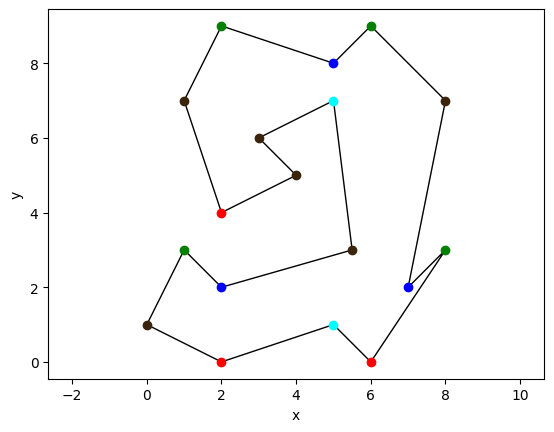

In [23]:
draw_polygon_colors(polygon_example_2,polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [24]:
def mat_det_2x2(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    a1,a2 = a
    b1,b2 = b
    c1,c2 = c
    return (a1-c1) * (b2-c2) - (a2-c2) * (b1-c1)

In [25]:
def orient(a,b,c):
  return mat_det_2x2(a,b,c)

In [26]:
def compare(a,b,c):
  # compare b with c
  # a is the point according to which we sort
  
  EPS = 10**(-24)

  result = orient(a,b,c)
  if(abs(result) <= EPS):
    return 0
  elif(result < 0):
    return -1
  elif(result > 0):
    return 1

In [27]:
# compare > 0 - skręt w lewo
# compare < 0 - skręt w prawo
# X - current vertex
# POCZĄTKOWY - X > left && X > right && compare(right,x,left) > 0
# DZIELĄCY -   X > left && X > right && compare(right,x,left) < 0
# ŁĄCZĄCy -    X < left && X < right && compare(right,x,left) < 0
# KOŃCOWY -    X < left && X < right && compare(right,x,left) > 0
# PRAWIDŁOWY - otherwise

def color_vertex(polygon):
  """
  Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
  :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
  :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
  """
  POCZATKOWY = 0
  KONCOWY = 1
  LACZACY = 2
  DZIELACY = 3
  PRAWIDLOWY = 4
  
  n = len(polygon)
  COLORS = [0] * n
  for i in range(0,n):
    x = polygon[i]
    left = polygon[(i+1)%n]
    right = polygon[(i-1)%n]
    
    if x[1] > left[1] and x[1] > right[1] and compare(right, x, left) > 0:
      COLORS[i] = POCZATKOWY
    elif x[1] < left[1] and x[1] < right[1] and compare(right, x, left) < 0:
      COLORS[i] = LACZACY
    elif x[1] < left[1] and x[1] < right[1] and compare(right, x, left) > 0:
      COLORS[i] = KONCOWY
    elif x[1] > left[1] and x[1] > right[1] and compare(right, x, left) < 0:
      COLORS[i] = DZIELACY
    else:
      COLORS[i] = PRAWIDLOWY
    
  return COLORS

Przeprowadź test poprawności powyższej funkcji. 

In [28]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.000s


Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

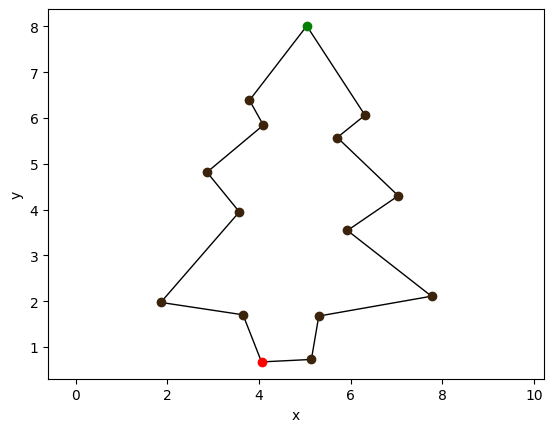

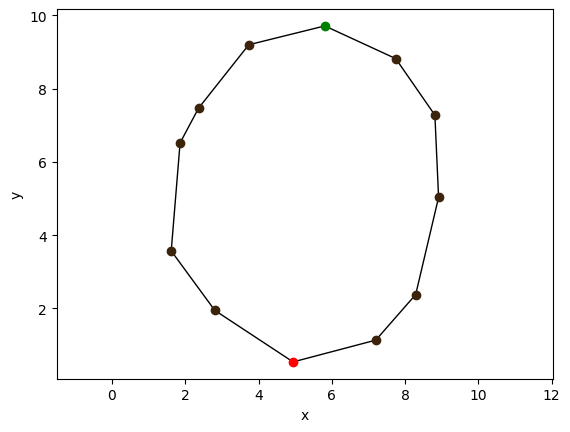

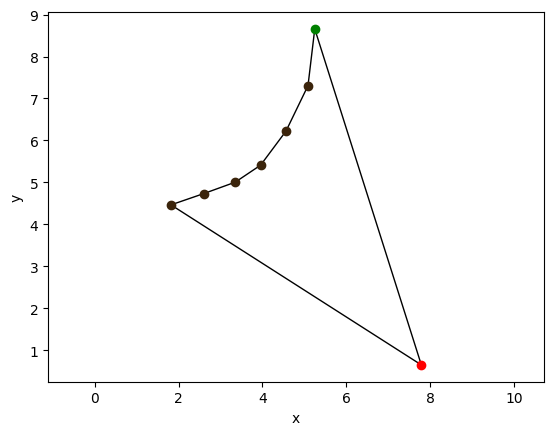

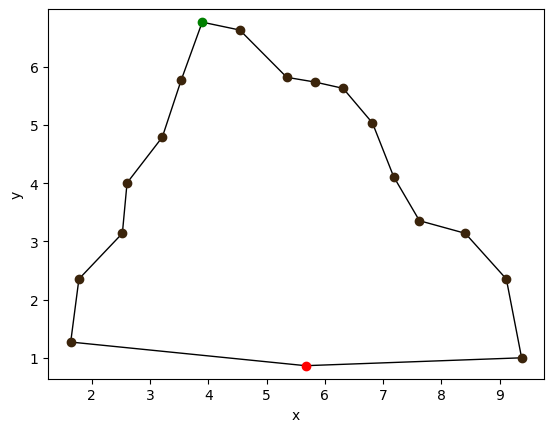

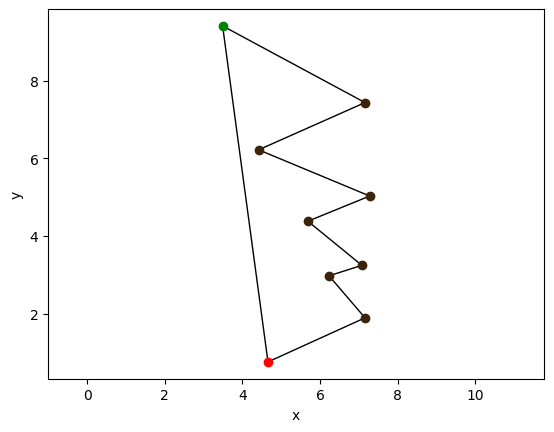

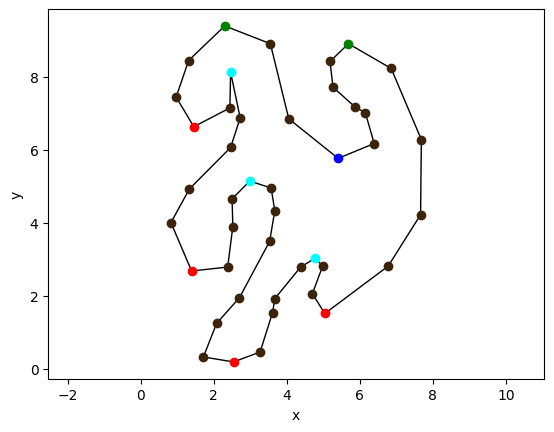

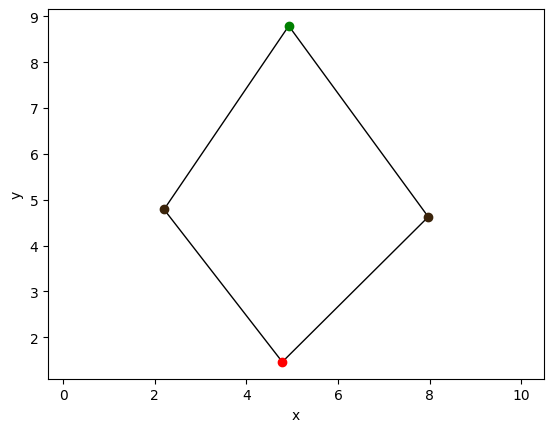

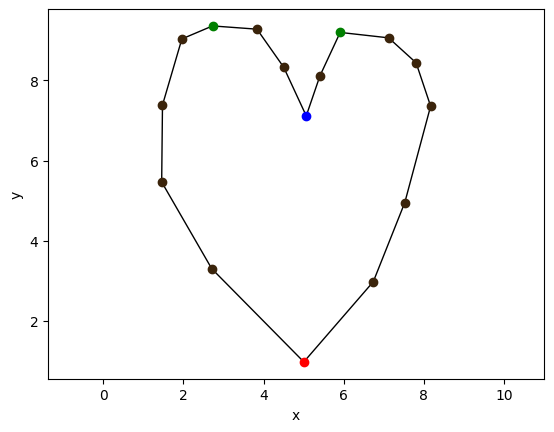

In [29]:
for key in polygons:
  draw_polygon_colors(polygons[key], color_vertex(polygons[key]))

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

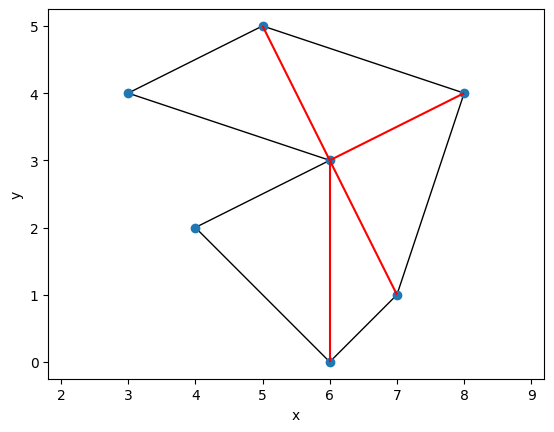

In [30]:
draw_polygon_tri(polygon_example_1, polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [31]:
def sort_monotonically(polygon):
  LEFT, RIGHT = partition_into_chains(polygon)
  n, R_length, L_length = len(polygon), len(RIGHT), len(LEFT)
  RESULT = [0] * n
  CHAIN = [0] * n
  i = j = k = 0
  
  while(i < L_length and j < R_length):
    if(LEFT[i][1] > RIGHT[j][1]):
      RESULT[k] = LEFT[i]
      CHAIN[k] = 0
      i += 1
    else:
      RESULT[k] = RIGHT[j]
      CHAIN[k] = 1
      j+= 1
    k+=1
  
  while(i < L_length):
    RESULT[k] = LEFT[i]
    CHAIN[k] = 0
    i += 1
    k += 1
  while(j < R_length):
    RESULT[k] = RIGHT[j]
    CHAIN[k] = 1
    j += 1
    k+=1
  
  return RESULT, CHAIN

In [32]:
def are_points_adjacent(INDEX_MAP, point_1, point_2, array_length):
  return INDEX_MAP[point_1] in ((INDEX_MAP[point_2] + 1)%array_length, (INDEX_MAP[point_2] - 1)%array_length)

In [33]:
def triangulation(polygon):
  """
  Funkcja dokonuje triangulacji wielokąta monotonicznego.
  :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
  :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki o indeksach 1 i 5 oraz 2 i 3
  """
  # len(A) == len(polygon) so n can stay
  n = len(polygon)
  if(n <= 2): return []
  A, CHAIN = sort_monotonically(polygon)
  INDEX_MAP = {t:i for i,t in enumerate(polygon)}
  RESULT = []
  STACK = [0,1]

  for current_index in range(2,n):
    stack_top = STACK[-1]
    
    if(CHAIN[stack_top] != CHAIN[current_index]):
      
      while(len(STACK) > 0):
        popped = STACK.pop()
        if(not are_points_adjacent(INDEX_MAP, A[popped], A[current_index],n)):
          RESULT.append((INDEX_MAP[A[popped]], INDEX_MAP[A[current_index]]))

      STACK.append(stack_top)
    
    else:
      
      direction = -1 if CHAIN[stack_top] == 1 else 1
      
      while(len(STACK) >= 2):
        stack_second = STACK[-2]
        if(compare(A[stack_second], A[stack_top], A[current_index]) * direction != 1 or are_points_adjacent(INDEX_MAP,A[stack_second], A[current_index],n)):
          break
        RESULT.append((INDEX_MAP[A[stack_second]], INDEX_MAP[A[current_index]]))
        STACK.pop()
        stack_top = stack_second
      
    STACK.append(current_index) 
  
  return RESULT

### Funkcja pozwalająca na otrzymanie listy krawędzi z wielokąta po triangulacji

In [34]:
def convert_to_complete_edge_list(polygon):
  T = triangulation(polygon)
  triangulation_edges = [(polygon[i], polygon[j]) for (i,j) in T]
  RESULT = [(polygon[-1], polygon[0])] + triangulation_edges + list(zip(polygon[:-1:], polygon[1::])) 
  return RESULT

convert_to_complete_edge_list(polygons['jez'])

[((3.4919354992528118, 9.415579131155303),
  (4.661290337962489, 0.7575704731466455)),
 ((3.4919354992528118, 9.415579131155303),
  (4.419354854091521, 6.2229384385146105)),
 ((4.419354854091521, 6.2229384385146105),
  (5.689516144414101, 4.383111598687771)),
 ((5.689516144414101, 4.383111598687771),
  (6.233870983123779, 2.976185191761364)),
 ((4.419354854091521, 6.2229384385146105),
  (6.233870983123779, 2.976185191761364)),
 ((6.233870983123779, 2.976185191761364),
  (4.661290337962489, 0.7575704731466455)),
 ((4.419354854091521, 6.2229384385146105),
  (4.661290337962489, 0.7575704731466455)),
 ((4.661290337962489, 0.7575704731466455),
  (7.161290337962489, 1.8939341095102817)),
 ((7.161290337962489, 1.8939341095102817),
  (6.233870983123779, 2.976185191761364)),
 ((6.233870983123779, 2.976185191761364),
  (7.080645176672165, 3.246747962324134)),
 ((7.080645176672165, 3.246747962324134),
  (5.689516144414101, 4.383111598687771)),
 ((5.689516144414101, 4.383111598687771),
  (7.282258

ODPOWIEDŹ: 

Przeprowadź testy poprawności powyższej funkcji.


In [35]:
Test().runtest(3, triangulation)

Lab 3, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.000s


Zwizualizuj powstały wielokąt podzielony na trójkąty.

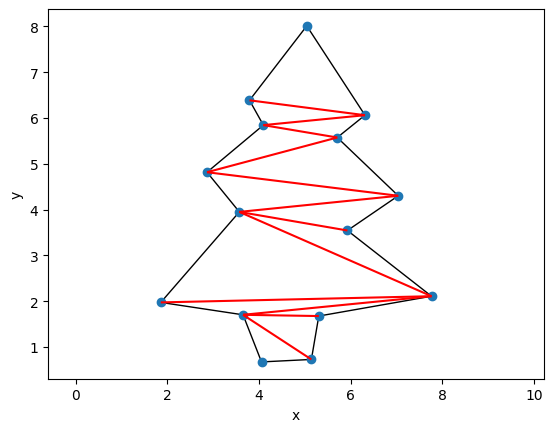

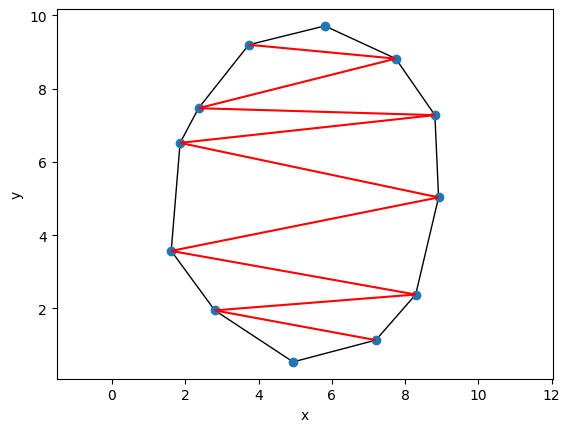

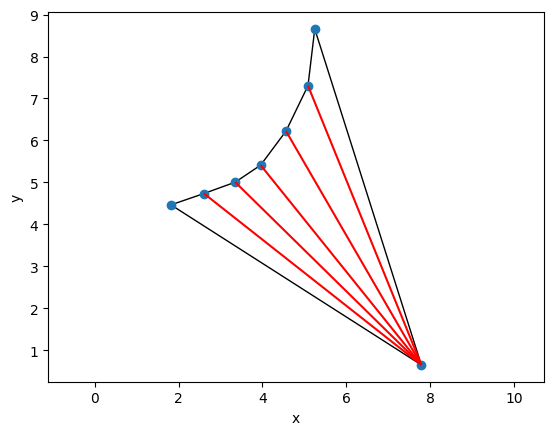

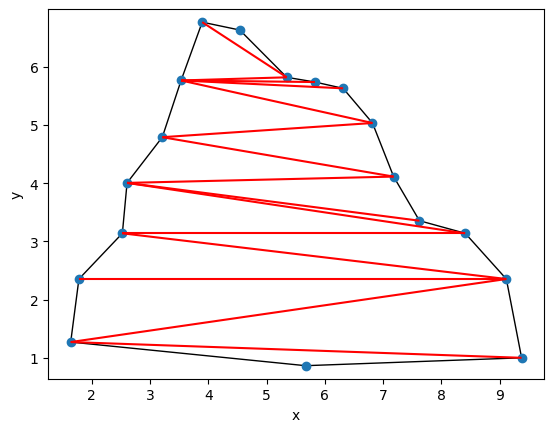

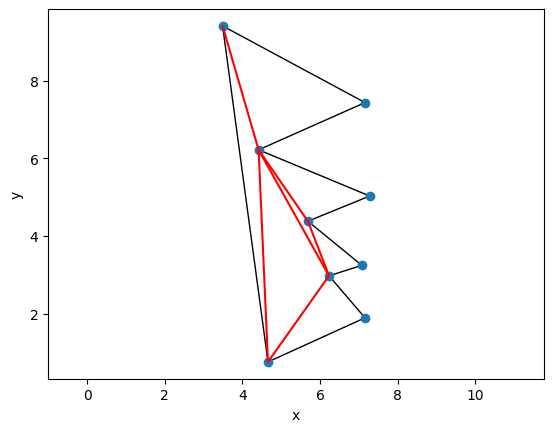

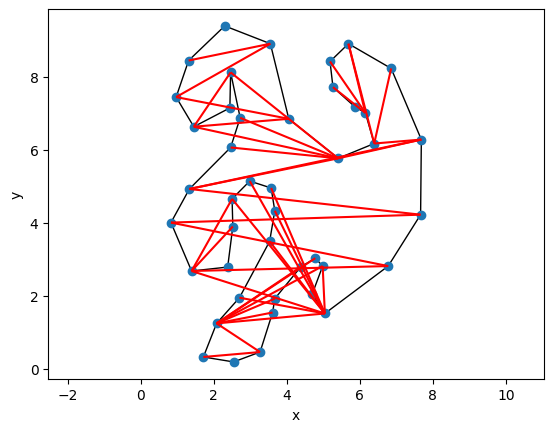

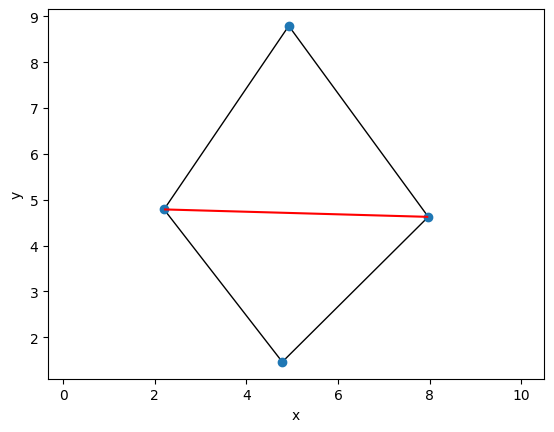

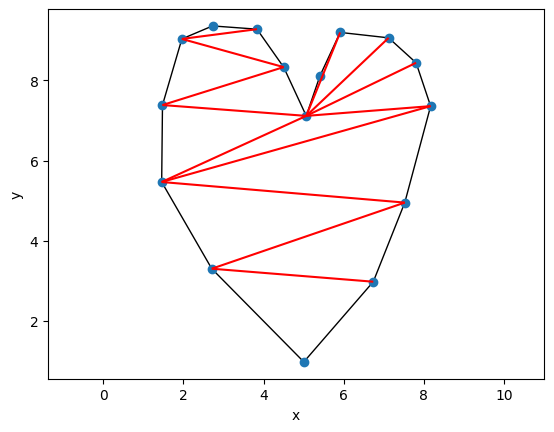

In [36]:
for key in polygons:
  T = [(polygons[key][i],polygons[key][j]) for i,j in triangulation(polygons[key])]
  draw_polygon_tri(polygons[key],T)

### Tworzenie i zapisywanie gifów

In [202]:
for key in polygons:
  T = [(polygons[key][i],polygons[key][j]) for i,j in triangulation(polygons[key])]
  visualiser = make_triangulation_gif(polygons[key], T )
  visualiser.show_gif()
  visualiser.save_gif(os.path.join('data', 'gif', f'{key}'))